In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# データの読み込み
df = pd.read_csv("mpgdata.csv",usecols=[0,1,2,3,4,6,7])

# MPGの外れ値「0」の行を削除
df = df[df["MPG"] != 0]
df

# Cylから3と5を削除
df = df[df["Cyl"] != 3]
df = df[df["Cyl"] != 5]

In [13]:
# Cyl, CountryCode列をOne-hot-Encoding
df = pd.get_dummies(df, columns=["Cyl","CountryCode"],drop_first=True)
df

,MPG,Displacement,Horsepower,Weight,Year,Cyl_6,Cyl_8,CountryCode_2,CountryCode_3
0,18.0,307.0,130,3504,70,0,1,0,0
1,15.0,350.0,165,3693,70,0,1,0,0
2,18.0,318.0,150,3436,70,0,1,0,0
3,16.0,304.0,150,3433,70,0,1,0,0
4,17.0,302.0,140,3449,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...
401,27.0,140.0,86,2790,82,0,0,0,0
402,44.0,97.0,52,2130,82,0,0,1,0
403,32.0,135.0,84,2295,82,0,0,0,0
404,28.0,120.0,79,2625,82,0,0,0,0


In [14]:
# カラムを標準化
df["Displacement"] = (df["Displacement"] - df["Displacement"].mean()) / df["Displacement"].std()
df["Horsepower"] = (df["Horsepower"] - df["Horsepower"].mean()) / df["Horsepower"].std()
df["Weight"] = (df["Weight"] - df["Weight"].mean()) / df["Weight"].std()

# Year列をmin-maxで正規化
df["Year"] = (df["Year"] - df["Year"].min()) / (df["Year"].max() - df["Year"].min())
df

,MPG,Displacement,Horsepower,Weight,Year,Cyl_6,Cyl_8,CountryCode_2,CountryCode_3
0,18.0,1.072885,0.663493,0.620847,0.0,0,1,0,0
1,15.0,1.484923,1.526438,0.842769,0.0,0,1,0,0
2,18.0,1.178290,1.156605,0.541002,0.0,0,1,0,0
3,16.0,1.044138,1.156605,0.537479,0.0,0,1,0,0
4,17.0,1.024974,0.910049,0.556266,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
401,27.0,-0.527356,-0.421352,-0.217526,1.0,0,0,0,0
402,44.0,-0.939395,-1.259641,-0.992491,1.0,0,0,1,0
403,32.0,-0.575268,-0.470663,-0.798750,1.0,0,0,0,0
404,28.0,-0.719002,-0.593941,-0.411267,1.0,0,0,0,0


# 機械学習を実行しよう

決定係数_train：0.8358694387302072
決定係数_test：0.8374865556534477
RMSE_train:3.1527101399083204
RMSE_test:3.2084811577542287


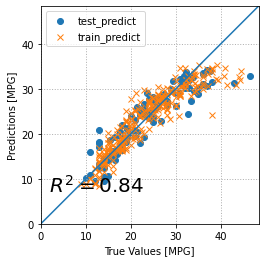

In [15]:
# SVR
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 入力データと正解ラベルに分割
data = np.array(df)    # Numpy配列に変換
X = data[:,1:]
y = data[:,0]

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# サポートベクターマシンによる学習
model = svm.SVR(C=1.0, kernel='linear', epsilon=0.1)    # 正則化パラメータ=1, 線形カーネルを使用
model.fit(X_train, y_train)                             # フィッティング

# 決定係数
r2_train = model.score(X_train, y_train)  
r2_test = model.score(X_test, y_test)
print("決定係数_train：" + str(r2_train))
print("決定係数_test：" + str(r2_test))

# 学習済みモデルを利用した予測値
y_pre_train = model.predict(X_train)    # 学習データでの予測
y_pre_test = model.predict(X_test)      # テストデータでの予測

# RMSEの計算
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pre_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pre_test))

print("RMSE_train:" + str(RMSE_train))
print("RMSE_test:" + str(RMSE_test))

# グラフ描画
plt.grid(linestyle='dotted', linewidth=1)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.scatter(y_test, y_pre_test, label='test_predict', lw=1, marker="o")
plt.scatter(y_train, y_pre_train, label='train_predict', lw=1, marker="x")
plt.legend()
plt.text(0.5, 7, '$\ R^{2}=$' + str(round(r2_test, 2)), fontsize=20)
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()